<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Exercise:  Visualizing high-dimensional datasets</h1>
# <h1 align="center"> using Dimensionality Reduction techniques </h1>

<hr />
<center>Constructor Academy, 2024</center>

Exercise II. Gene expression RNAseq
============================
Use genomic [gene expression dataset](https://drive.google.com/drive/folders/1cFaJ0Oh-8-wv7xmUoC9xvdJ5NyujTfC8?usp=sharing) (6063 samples * 14460 identifiers). This dataset is already prepared for you by removing non-active genes which reduced its size from 60499 to 14460 features. If you are a domain expert, you can clean the dataset further. Otherwise, you can use the one provided.  
The original dataset was taken from [here](https://xenabrowser.net/datapages/?dataset=tcga_RSEM_gene_tpm&host=https%3A%2F%2Ftoil.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443).  

- Visualize your dataset in a scatter plot by projecting it via t-SNE and/or UMAP, PCA or another dimensionality reduction technique into a 2-dimensional space.
- This article on [Visualizing high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b) is a good starting point. Read carefully the article on [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/), so that you don't get tricked by your plots!

- __Perform a principal component analysis (PCA).__
    - How many principal components represent 95% of the total variance?
    - Apply clustering after PCA.
    - Analyze and interpret the results by creating visuals.
    - Color the individual points from the 2-D scatter plot according to the cluster they belong to.


- Redo the clustering by using [UMAP (Uniform Manifold Approximation and Projection)](https://umap-learn.readthedocs.io/en/latest/index.html) for dimensionality reduction.

- Compare the cluster you found with the [primary_disease](https://drive.google.com/file/d/1-JrZ42o6kjK_jthPXYMdR-FY7CbqP-1m/view?usp=sharing) label from clinicalMatrix dataset. Hint: use beautiful [Sankey Diagrams](https://plotly.com/python/sankey-diagram/)
- Using the plots (scatterplot and Sankey), compare the effect of different dimensionality reduction methods on the clustering.


--------

# Notebook Set-Up

In [1]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


<span style="color:green">**Modules and Libraries**

In [2]:
# ----------------------------------GENERAL---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------OTHER-----------------------------------
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# ----------------------------------PIPELINE AND MODELS---------------------
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# ----------------------------------VISUALIZATION---------------------------
from sklearn.manifold import TSNE
from umap import UMAP
from plotly import graph_objs as go
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 18, "figure.figsize": (18, 10), "font.family": "DejaVu Sans"})

<span style="color:green">**Necessary Functions for this Notebook**

In [3]:
def rows_and_columns_counter (df):
    print('Imported DataFrame has the following shape:', df.shape)
    print('\tso **', len(df.index),'** rows')
    print('\tso **', len(df.columns),'** columns')

In [4]:
# FUNCTION --> Ploting distributions of sample columns
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()

# Loading Data

In [5]:
gene_express = pd.read_csv('../data/tcga_RSEM_gene_tpm_sample_dataset.csv',index_col=0)

# Data Exploration

<span style="color:green">**Data Frame**

In [6]:
rows_and_columns_counter (gene_express)

Imported DataFrame has the following shape: (6063, 14460)
	so ** 6063 ** rows
	so ** 14460 ** columns


the data has more columns than rows.

this indicates that you should look into dimensionality reduction methods

In [7]:
gene_express.head(3)

ENSG00000167578.16  ENSG00000078237.5  ENSG00000146083.11  \
sample                                                                       
TCGA-S9-A7J2-01              4.8881             2.3019              5.3806   
TCGA-44-6778-01              5.3162             3.5633              4.9996   
TCGA-C8-A1HL-01              4.9782             2.6624              3.9580   

                 ENSG00000198242.13  ENSG00000134108.12  ENSG00000182141.9  \
sample                                                                       
TCGA-S9-A7J2-01              9.7664              5.8205             3.5009   
TCGA-44-6778-01              9.7699              5.4446             2.7805   
TCGA-C8-A1HL-01             10.7877              5.7415             1.3109   

                 ENSG00000280143.1  ENSG00000258610.1  ENSG00000070087.13  \
sample                                                                      
TCGA-S9-A7J2-01             1.0363             4.8535              8.3059   
TCGA-44-6778-01             2.2330             2.8974              6.2572   
TCGA-C8-A1HL-01             1.3846             2.3649              6.3803   

                 ENSG00000153561.12  ...  ENSG00000133313.14  \
sample                               ...                       
TCGA-S9-A7J2-01              3.9810  ...              7.1131   
TCGA-44-6778-01              4.1891  ...              7.3911   
TCGA-C8-A1HL-01              3.8581  ...              7.1204   

                 ENSG00000066044.13  ENSG00000146587.17  ENSG00000107863.16  \
sample                                                                        
TCGA-S9-A7J2-01              5.0050              2.5437              6.3227   
TCGA-44-6778-01              5.2991              2.5061              4.1954   
TCGA-C8-A1HL-01              5.6300              1.9527              3.2251   

                 ENSG00000213782.7  ENSG00000146707.14  ENSG00000158417.10  \
sample                                                                       
TCGA-S9-A7J2-01             5.2384              4.2965              5.1465   
TCGA-44-6778-01             4.5976              2.6487              5.1740   
TCGA-C8-A1HL-01             4.9016              2.4727              5.6511   

                 ENSG00000089177.17  ENSG00000123685.8  ENSG00000105063.18  
sample                                                                      
TCGA-S9-A7J2-01              0.7748             1.1577              4.8151  
TCGA-44-6778-01              3.0585             1.5902              5.6436  
TCGA-C8-A1HL-01              5.1094             1.0293              4.4095  

[3 rows x 14460 columns]

<span style="color:green">**DataFrame Distributions Visualization:** Plot distribution of sample columns
    
- As there are 14460 columns, we cannot look at every feature individually.
- Here we take a random sample of only 15 columns and look at their distributions.
- This is to get a better feel of what the data looks like.


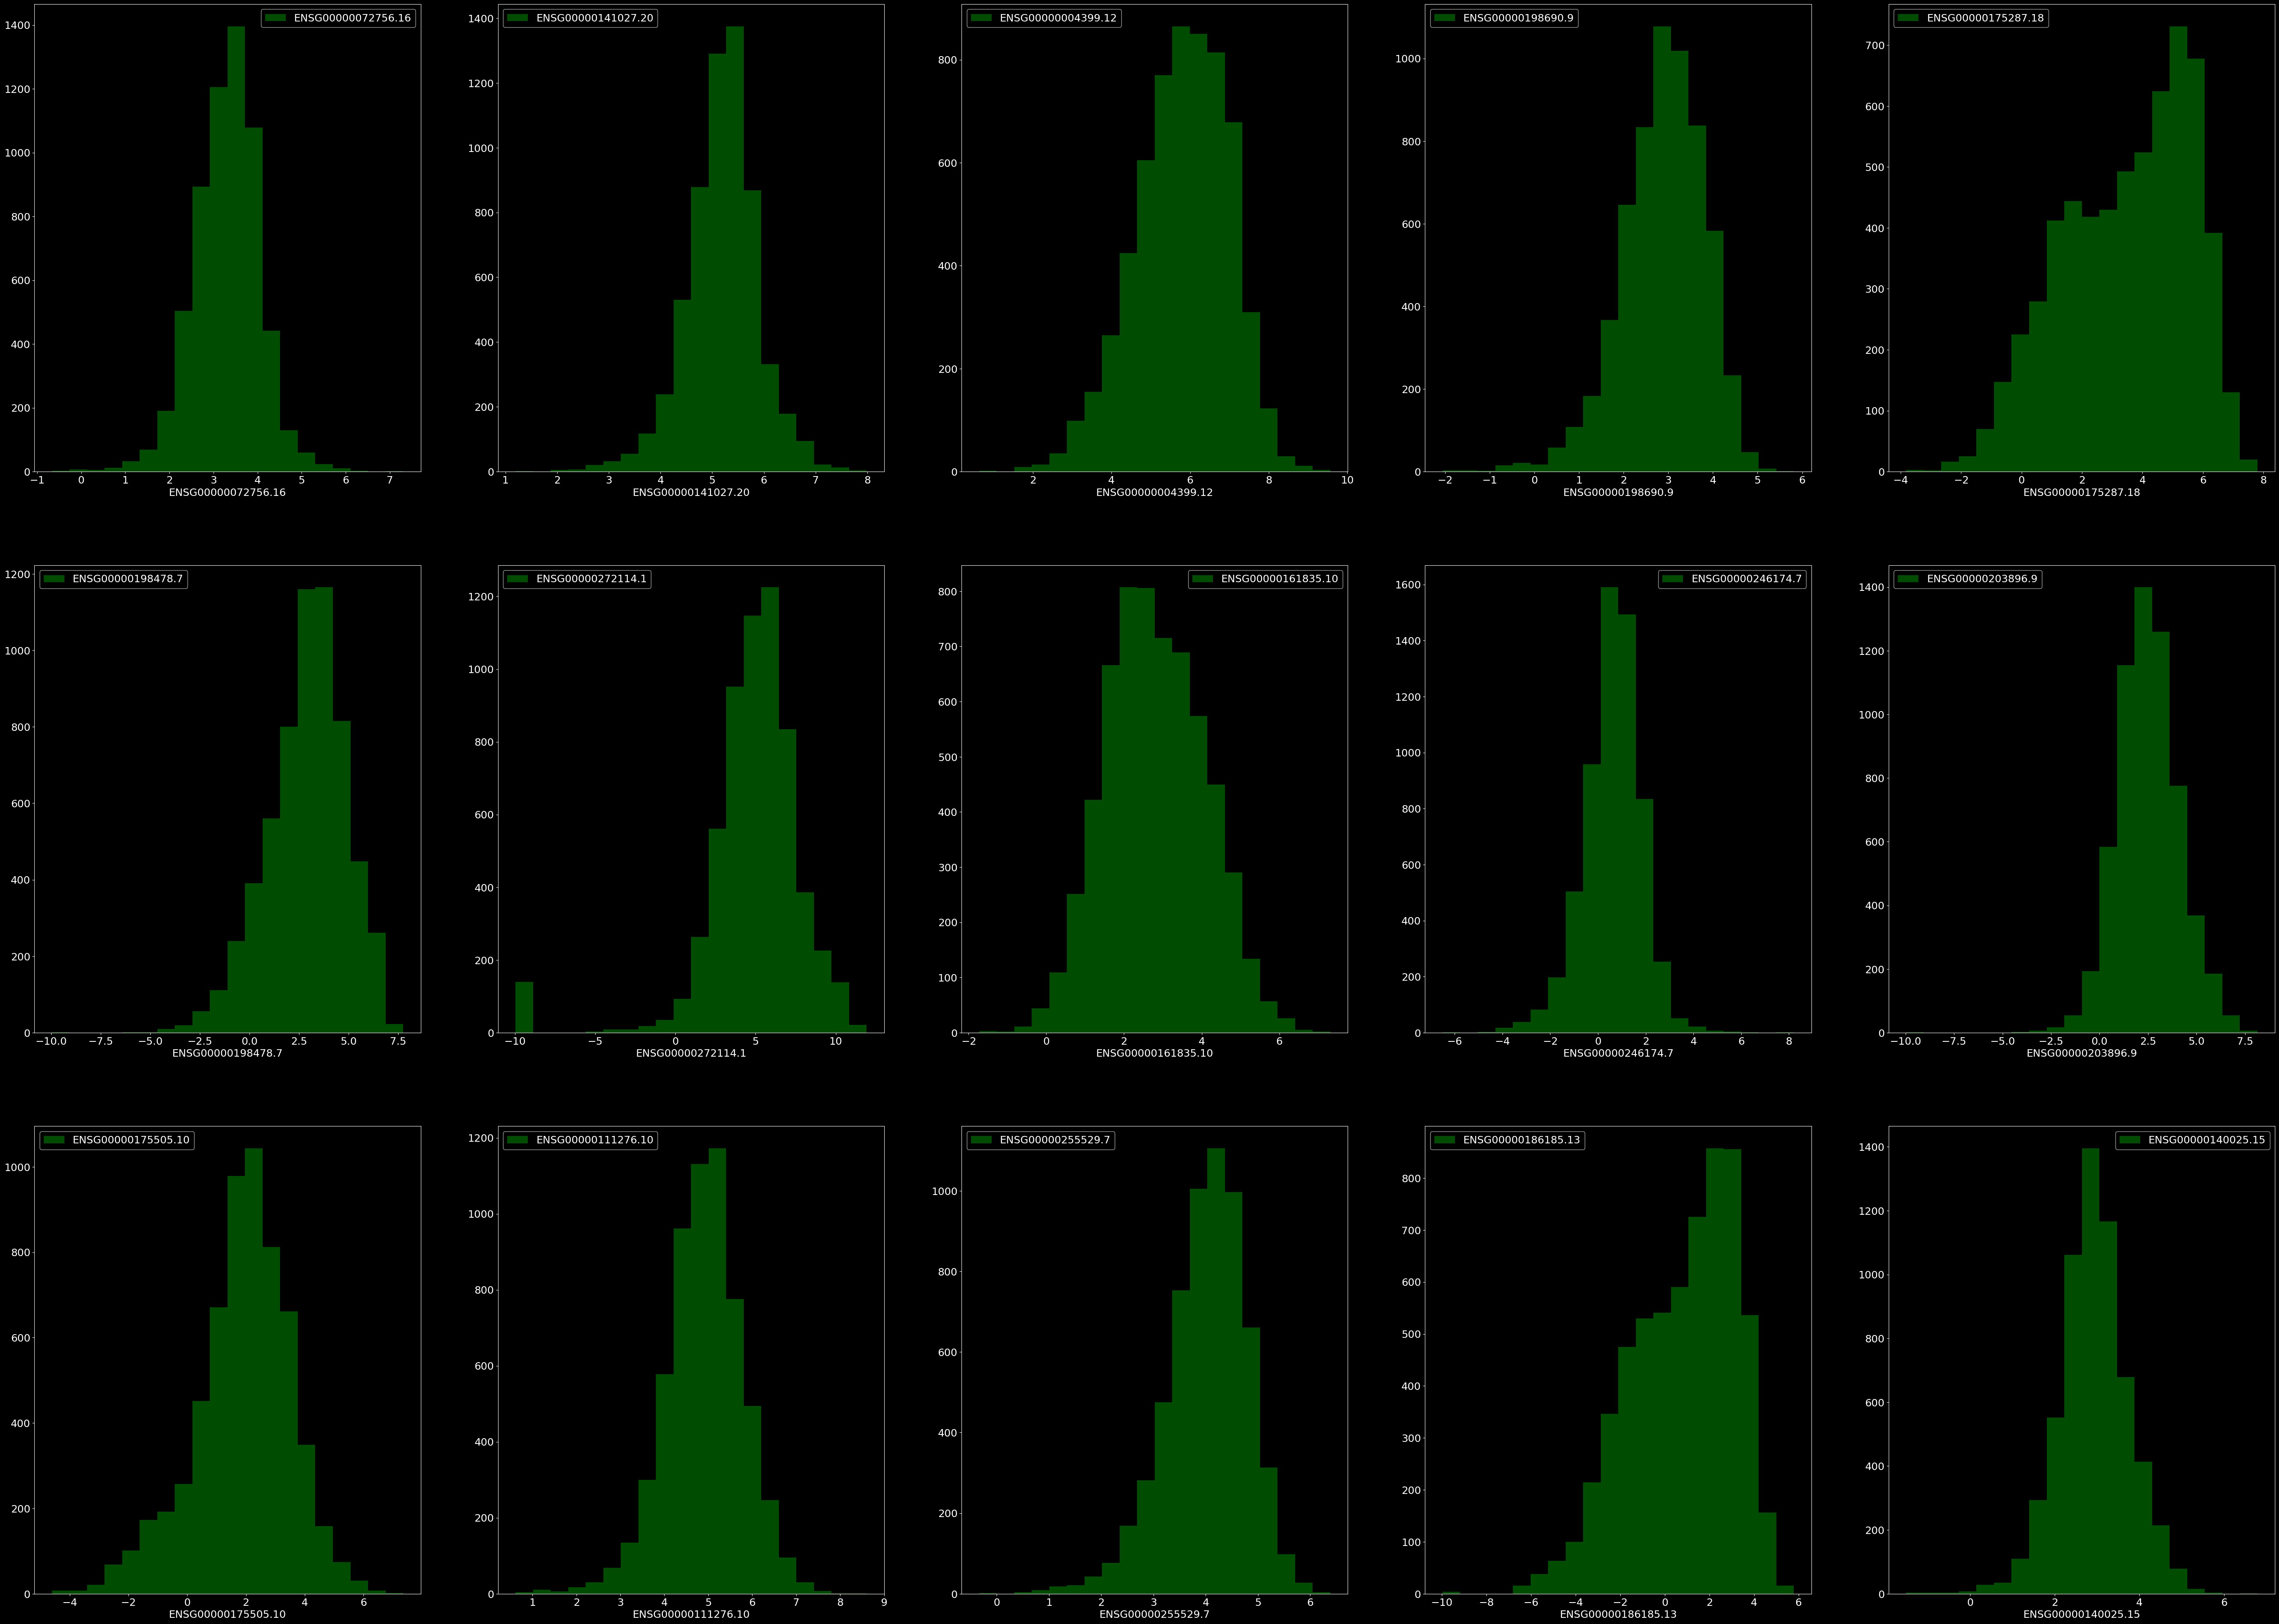

In [8]:
data = gene_express.sample(n=15,axis='columns')

plot_distrib(data, ncols=5, nrows=3, figsize=(70, 50))

# Dimensionality Reduction for Visualisation

## t-SNE

- **Important note:** bear in mind that t-SNE is mainly used for visualization purposes. So you shall not include it within the Pipeline

<span style="color:green">**Scatter Visualization in 2-D:** Using t-distributed Stochastic Neighbor Embedding  **(t-SNE)**
    
- (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

TSNE Parameters:
- n_components = Dimension of the embedded space. We are projecting it onto 2 dimensions, so we can plot it in a scatter plot

- perplexity = number of nearest neighbors that is used in other manifold learning algorithms. Consider selecting a value between 5 and 50. As the perplexity value increases, we generally observe a tendency towards clearer shapes in the visualization

- n_iter = Maximum number of iterations for the optimization. Should be at least 250


In [9]:
gene_express.dropna(axis = 1, inplace = True)

In [10]:
gene_express.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6063 entries, TCGA-S9-A7J2-01 to TCGA-BR-8588-01
Columns: 14460 entries, ENSG00000167578.16 to ENSG00000105063.18
dtypes: float64(14460)
memory usage: 668.9+ MB


In [11]:
# t-SNE Definition:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)

In [12]:
#we fit and transform high dimensional dataset to the tsne object defined above
# Fit_Transform:
X_tsne = tsne.fit_transform(gene_express)
X_tsne

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6063 samples in 1.137s...
[t-SNE] Computed neighbors for 6063 samples in 4.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6063
[t-SNE] Computed conditional probabilities for sample 2000 / 6063
[t-SNE] Computed conditional probabilities for sample 3000 / 6063
[t-SNE] Computed conditional probabilities for sample 4000 / 6063
[t-SNE] Computed conditional probabilities for sample 5000 / 6063
[t-SNE] Computed conditional probabilities for sample 6000 / 6063
[t-SNE] Computed conditional probabilities for sample 6063 / 6063
[t-SNE] Mean sigma: 40.491876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.653996
[t-SNE] KL divergence after 1000 iterations: 1.225126


array([[-54.624413 , -17.511059 ],
       [ 44.316143 ,  -9.445219 ],
       [ 11.159949 ,  15.8763075],
       ...,
       [ 42.562485 , -12.112472 ],
       [ 47.26974  ,  26.097464 ],
       [ 45.405598 ,  24.839764 ]], dtype=float32)

In [13]:
#X_tsne is the embedding of the training data in low-dimensional space (2 dimensions)

print('original data shape:', gene_express.shape) #(6063, 14460)
print('embedded data shape:', X_tsne.shape) #(6063, 2)

original data shape: (6063, 14460)
embedded data shape: (6063, 2)


__t-SNE Visualization:__
- t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by identifying observed clusters based on similarity of data points with multiple features.
- Now the data has been reduced to two dimensions, we can plot and visualize it.

- This was not possible with the original 14460 columns

- However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.



__t-SNE compared to other techniques:__
- t-SNE does not scale well (PCA is much quicker)
- t-SNE is for visualization purposes only. Clustering on t-SNE is a bad idea because it doesn't preserve the global data structure. Within cluster distances are  meaninful, but cluster distances between clusters are not guaranteed
- We will only do clustering with PCA


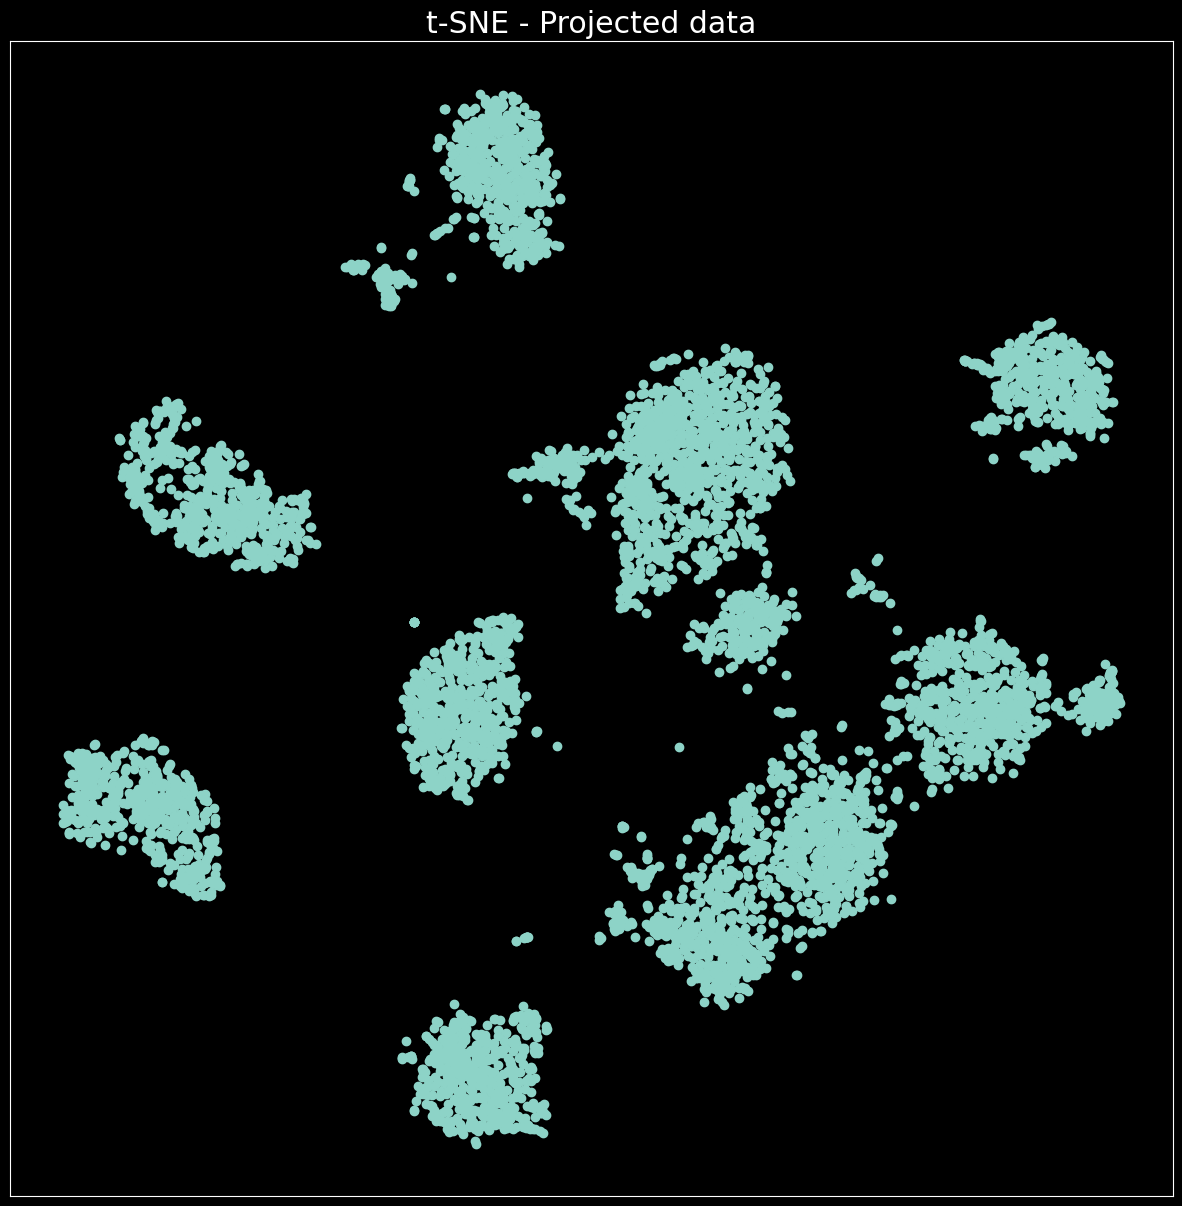

In [14]:
# Plot Result of t-SNE:

fig = plt.figure(figsize =(15, 15))

# plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()

## UMAP

<span style="color:green">**Scatter Visualization in 2-D:** Using Uniform Manifold Approximation and Projection **(UMAP)**
    
    
- The biggest advantage of UMAP over t-SNE is the more optimal balance between local and global structure and the computational efficiency

- https://umap-learn.readthedocs.io/en/latest/



UMAP Parameters:
- n_neighbors = parameter to control how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data.

    This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.


- n_components = the dimensionality of the reduced dimension space we will be embedding the data into


- min_dist = parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation.


In [15]:
# UMAP Definition:
umap_embeddings = UMAP(n_neighbors=30, n_components=2,  min_dist= 0.3)

In [16]:
# Fit_Transform:
X_umap = umap_embeddings.fit_transform(gene_express)

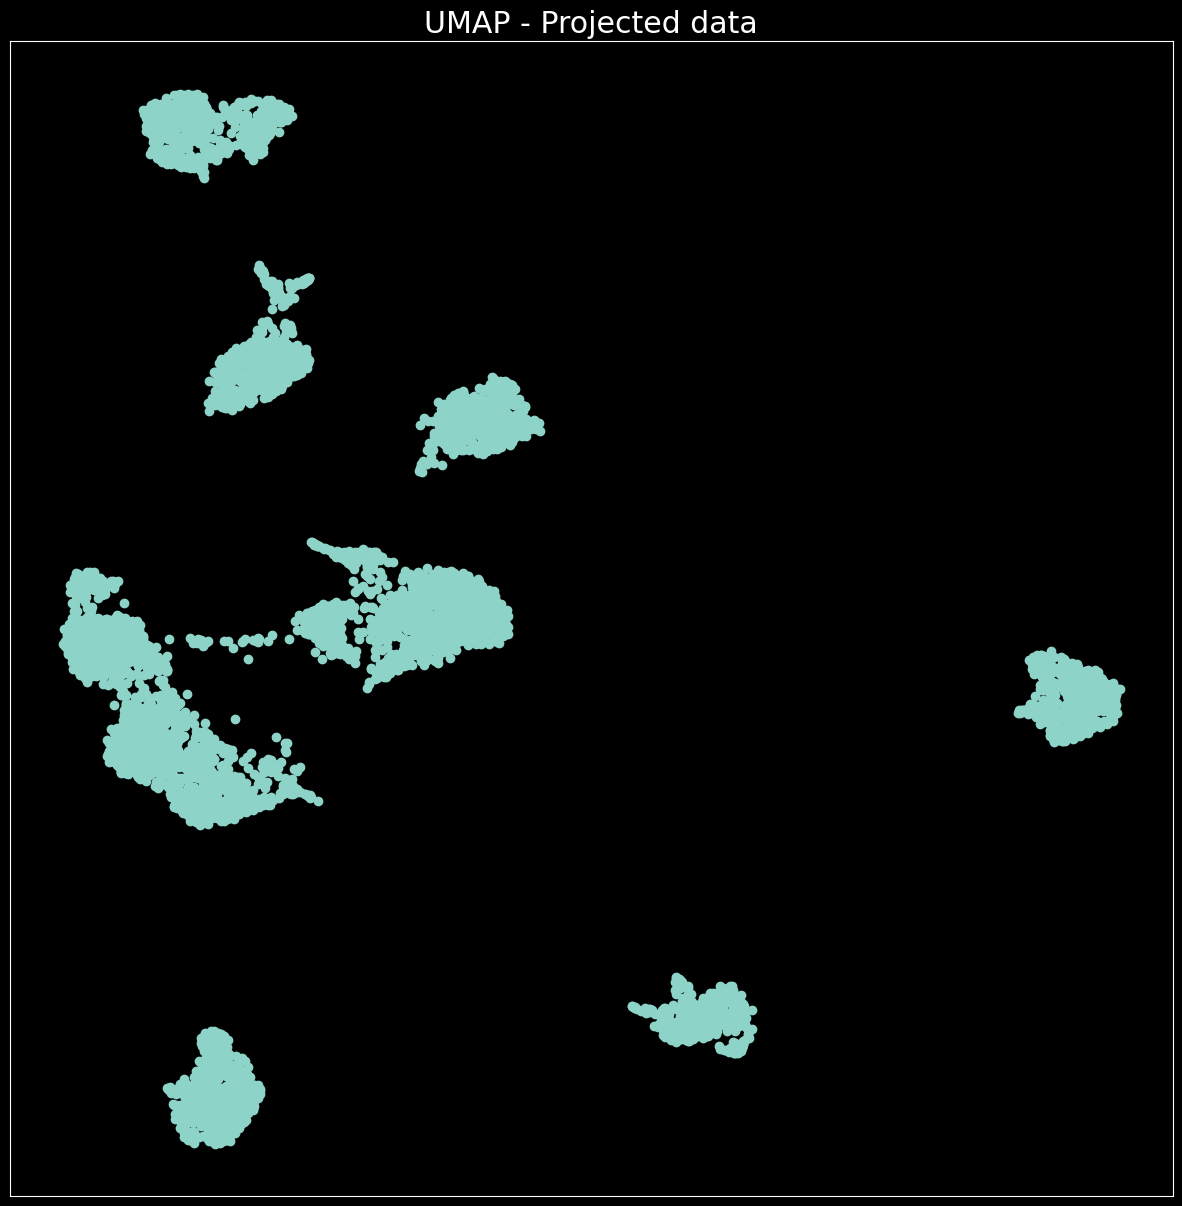

In [17]:
# Plot Result of UMAP:


fig = plt.figure(figsize =(15, 15))


# plot oroginal roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_umap[:, 0], X_umap[:, 1],cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('UMAP - Projected data')
plt.show()


#Think about how different the t-SNE and UMAP plots look, given that they are they same data!

# Dimensionality Reduction for Clustering

## Principal Component Analysis **(PCA)**

<span style="color:green"> Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
    
- The priority of PCA is to preserve large variances in the data using singular value decomposition.
- It tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed


- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [18]:
# PCA Definition:
pca = PCA()

In [19]:
# Pipeline Definition: 1º) Scaling --> 2º) Model
pipe_pca = Pipeline([("scl", StandardScaler()), ("pca", pca)])

In [20]:
# Obtaining PCA Parameters:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [21]:
# Fit_transform:
gene_pca = pipe_pca.fit_transform(gene_express)

In [22]:
#The explained_variance_ratio_ attribute in sklearn returns the percentage of variance explained by each of the selected components.
#remember we are looking for the max variance between

pipe_pca.named_steps["pca"].explained_variance_ratio_



array([1.80434411e-01, 9.86021403e-02, 7.22952270e-02, ...,
       7.67652368e-07, 7.33360101e-07, 1.48320942e-34])

In [23]:
#numpy cumsum returns the cumulative sum of the elements
#in this case, i

evr = np.cumsum(pipe_pca.named_steps["pca"].explained_variance_ratio_)
evr

array([0.18043441, 0.27903655, 0.35133178, ..., 0.99999927, 1.        ,
       1.        ])

<span style="color:green">**PCA Visualization:** interceptor location

In [24]:
# Finding out the interceptor that represents 95% of the total variance:
x_intercept = np.argmax(evr > 0.95) #evr is an array of the cumulative variances
print('The interceptor is located at component: ', x_intercept)

The interceptor is located at component:  1409


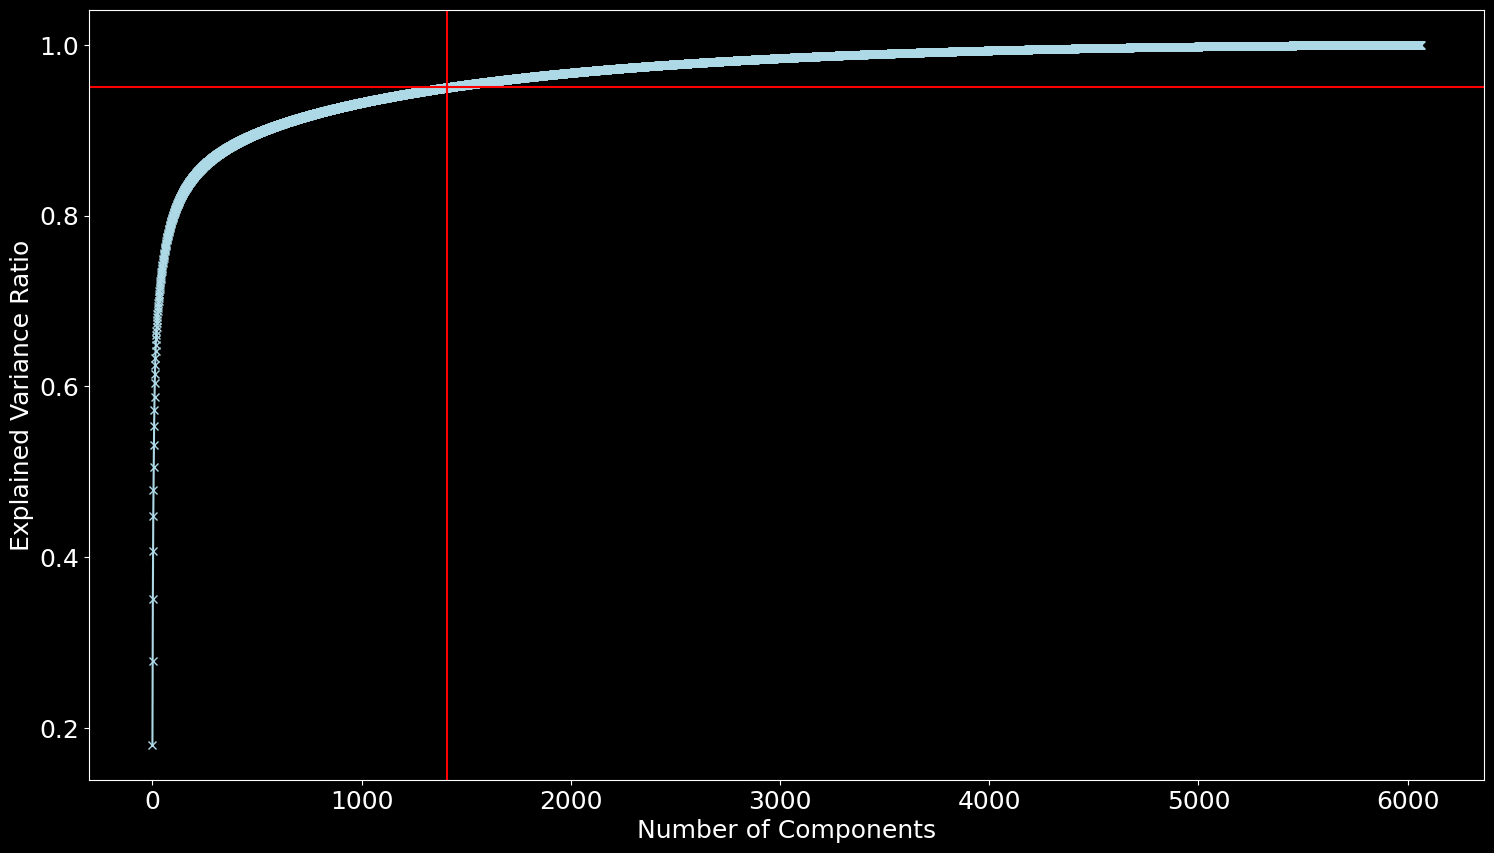

In [25]:
# Ploting the location of the interceptor:

plt.plot(evr, "-x", color="lightblue") #plotting the cumulative sum of variance, so we can where the variance increases are not as pronounced
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.axvline(x=x_intercept, color="red") #vertical line to see the number of components that corresponds to the 95% total variance
plt.axhline(y=0.95, color="red") #horizontal line for 95% of the total variance
None

<span style="color:green">**PCA Scatter Visualization in 2-D:** PCA example components
    


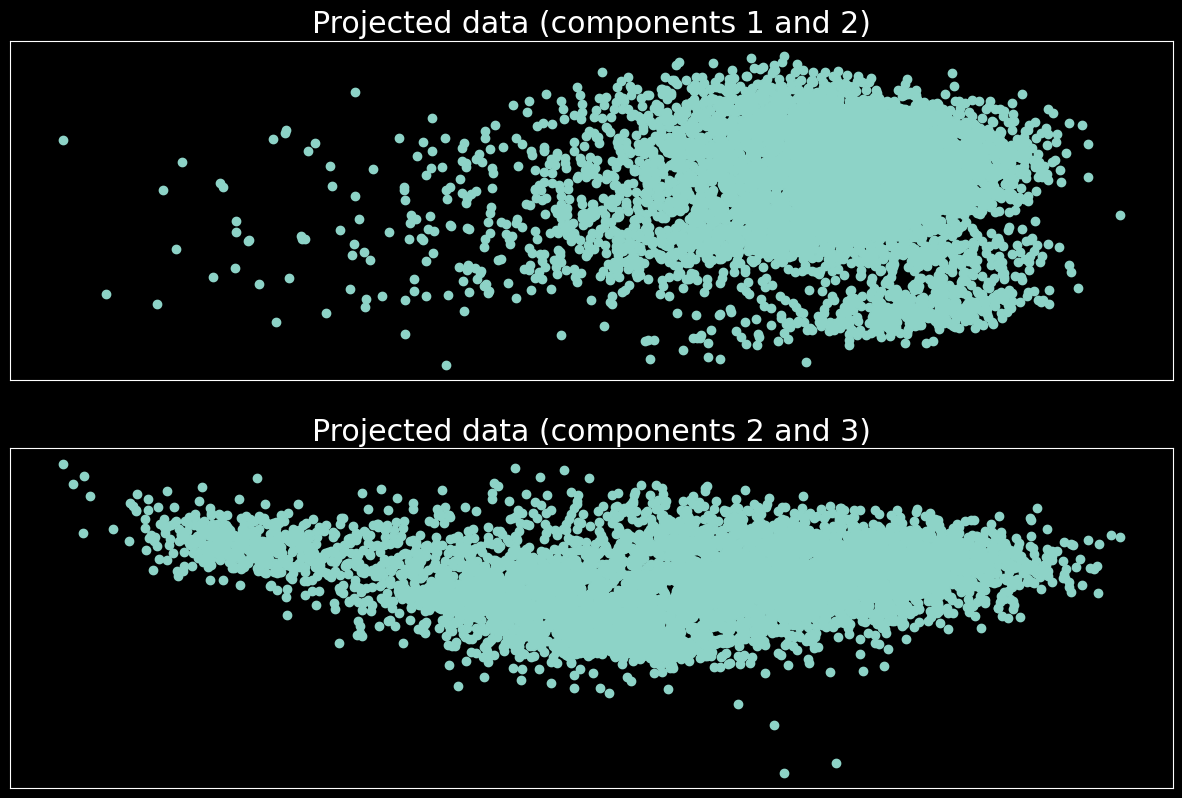

In [26]:
#After dimensionality reduction, we can use gene_pca plot the principal components

plt.rcParams["figure.figsize"] = (15, 15)

fig = plt.figure()

# # plot original roll
# ax = fig.add_subplot(311, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll (components 1 and 2)
ax = fig.add_subplot(311)
ax.scatter(gene_pca[:, 0], gene_pca[:, 1],  cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 1 and 2)')

# plot projected roll (components 2 and 3)
ax = fig.add_subplot(312)
ax.scatter(gene_pca[:, 1], gene_pca[:, 2],cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 2 and 3)')
plt.show()


# # plot projected roll (components 1 and 3)
# ax = fig.add_subplot(313)
# ax.scatter(gene_pca[:, 2], gene_pca[:, 3],cmap=plt.cm.Spectral)
# plt.axis('tight')
# plt.xticks([]), plt.yticks([])
# plt.title('Projected data (components 1 and 3)')
# plt.show()

plt.show()

# Clustering

<span style="color:green">**K-Means after PCA:** select the ‘optimal’ number of clusters with the **Elbow Method (for a 95% of variance)**
    
- After using PCA for dimensionality reduction, we can use k-means clustering to find the number of clusters.
- Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center
- The k-means plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.


In [27]:
r_seed = 42  # random seed to use during modeling for reproducibility
cluster_errors = []

for i in range(1, 14):
    n_clusters = i
    pipe_pca_kmean = Pipeline(
        [
            ("scl", StandardScaler()),
            ("pca", PCA(0.95)),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))]
    )

    pipe_pca_kmean.fit(gene_express)
    pipe_pca_kmean.predict(gene_express)
    cluster_errors.append(pipe_pca_kmean.named_steps["cluster"].inertia_)

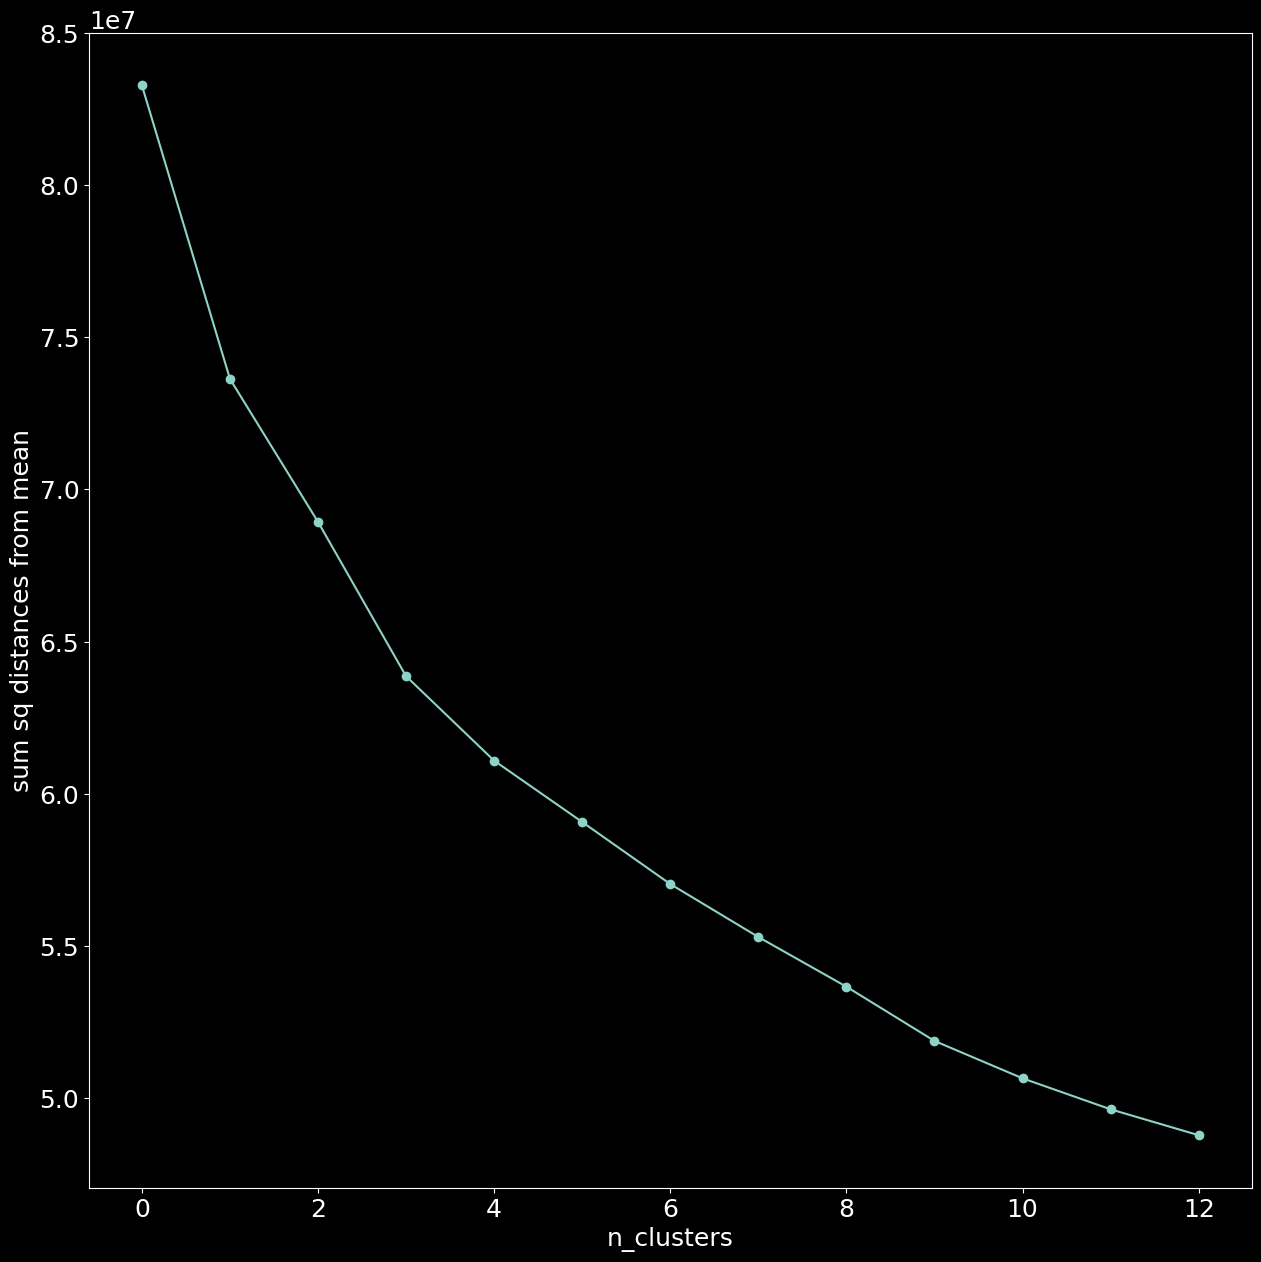

In [28]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

<span style="color:green">**K-Means clustering with PCA:**

In [29]:
# Pipeline Definition: 1º) Scaling --> 2º) Model --> 3º) Clusterization Method

pipe_pca_kmean = Pipeline(
        [
            ("scl", StandardScaler()),
            ("pca", PCA(0.95)),
            ("cluster", KMeans(n_clusters=6, random_state=r_seed, verbose=0))]
    )


In [30]:
# Fit:
pipe_pca_kmean.fit(gene_express)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('cluster', KMeans(n_clusters=6, random_state=42))])

In [31]:
gene_kmean_cluster = pd.DataFrame(
    data = pipe_pca_kmean.named_steps["cluster"].labels_,
    index = gene_express.index,
    columns=['kmean_cluster']
)

In [32]:
gene_kmean_cluster['kmean_cluster'].value_counts()

kmean_cluster
3    1383
0    1361
1    1231
4     947
2     631
5     510
Name: count, dtype: int64

<span style="color:green">**Visualize cluster by t-SNE:**

In [33]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=611)

In [34]:
# X_tsne = tsne.fit_transform(gene_express)

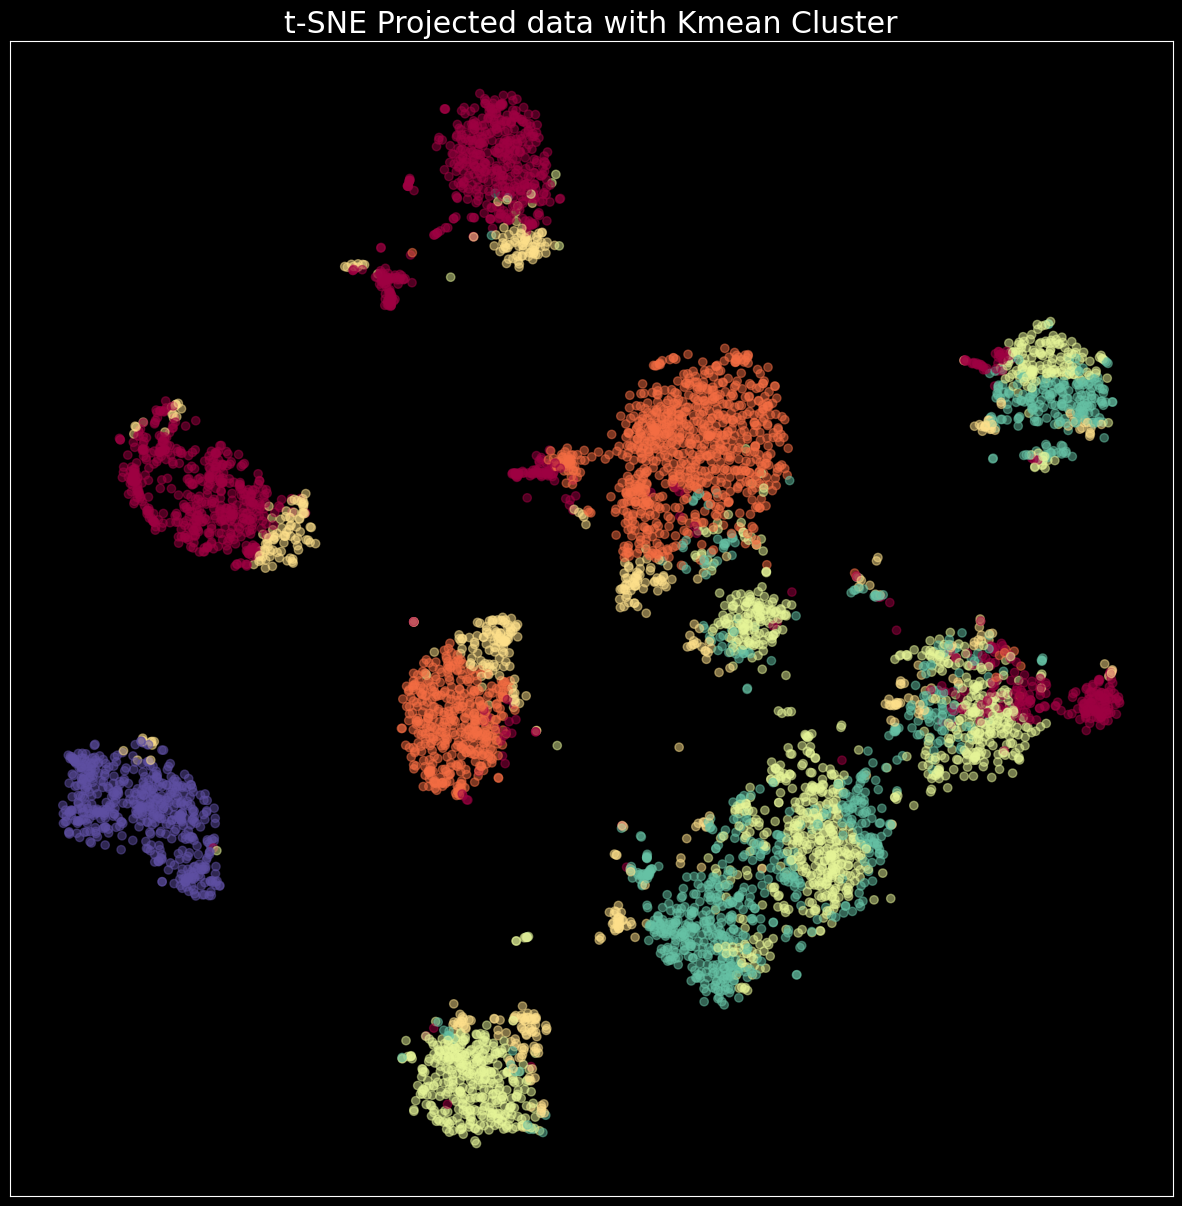

In [35]:
fig = plt.figure()

# # plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c= gene_kmean_cluster['kmean_cluster'],alpha=.5, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE Projected data with Kmean Cluster')
plt.show()


# plt.show()

<span style="color:green">**Uniform Manifold Approximation and Projection (UMAP):** using elbow method

In [36]:
rows_and_columns_counter (gene_express)

Imported DataFrame has the following shape: (6063, 14460)
	so ** 6063 ** rows
	so ** 14460 ** columns


In [37]:
cluster_errors = []
for i in range(1, 14):
    n_clusters = i
    pipe_umap_kmean = Pipeline(
        [
            ("scl", StandardScaler()),
            ("UMAP", UMAP(n_neighbors=30, n_components=100,  min_dist= 0.3, init='random')),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))]
    )
    pipe_umap_kmean.fit(gene_express)
    pipe_umap_kmean.predict(gene_express)
    cluster_errors.append(pipe_umap_kmean.named_steps["cluster"].inertia_)

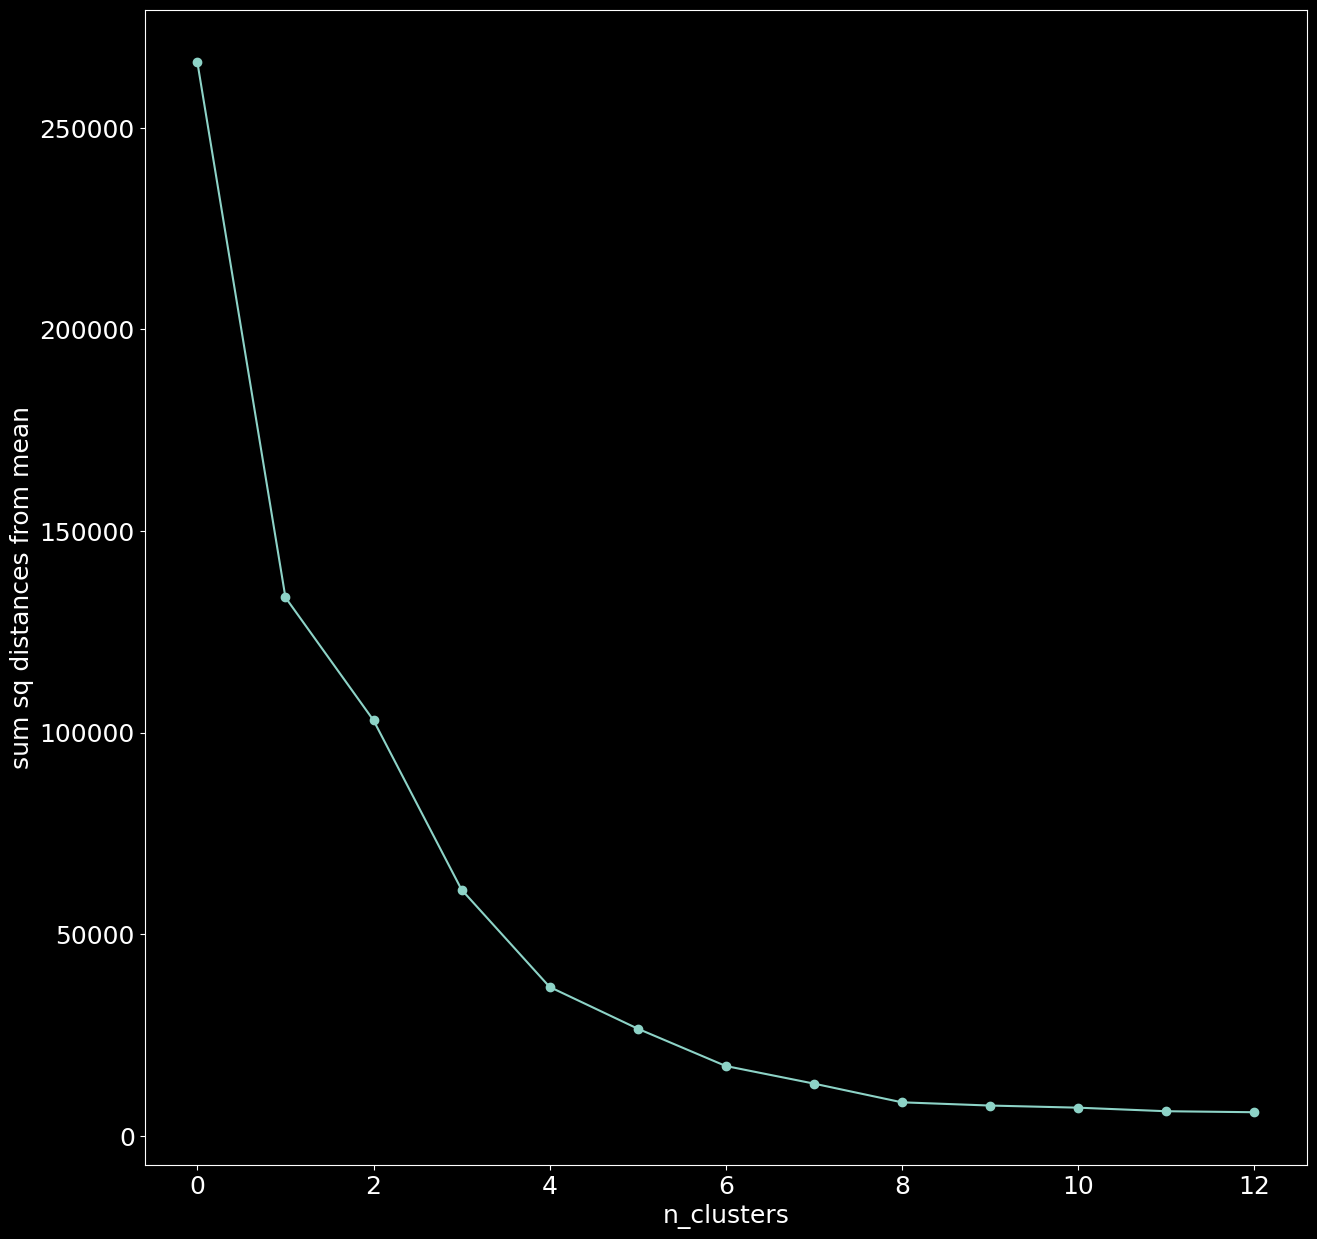

In [38]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

<span style="color:green">**K-mean after UMAP:**

In [39]:
pipe_umap_kmean = Pipeline(
        [
            ("scl", StandardScaler()),
            ("UMAP", UMAP(n_neighbors=30, n_components=100,  min_dist= 0.3, init="random")),
            ("cluster", KMeans(n_clusters=6, random_state=r_seed, verbose=0))]
    )

In [40]:
pipe_umap_kmean.fit(gene_express)

Pipeline(steps=[('scl', StandardScaler()),
                ('UMAP',
                 UMAP(init='random', min_dist=0.3, n_components=100, n_neighbors=30, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('cluster', KMeans(n_clusters=6, random_state=42))])

In [41]:
gene_umap_cluster = pd.DataFrame(
    data = pipe_umap_kmean.named_steps["cluster"].labels_,
    index = gene_express.index,
    columns=['Cluster_id'])

In [42]:
gene_umap_cluster['Cluster_id'].value_counts()

Cluster_id
0    2239
2    1196
4    1122
3     546
1     521
5     439
Name: count, dtype: int64

### Visualize cluster by t-SNE

In [43]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=611)

In [44]:
# X_tsne = tsne.fit_transform(gene_express)

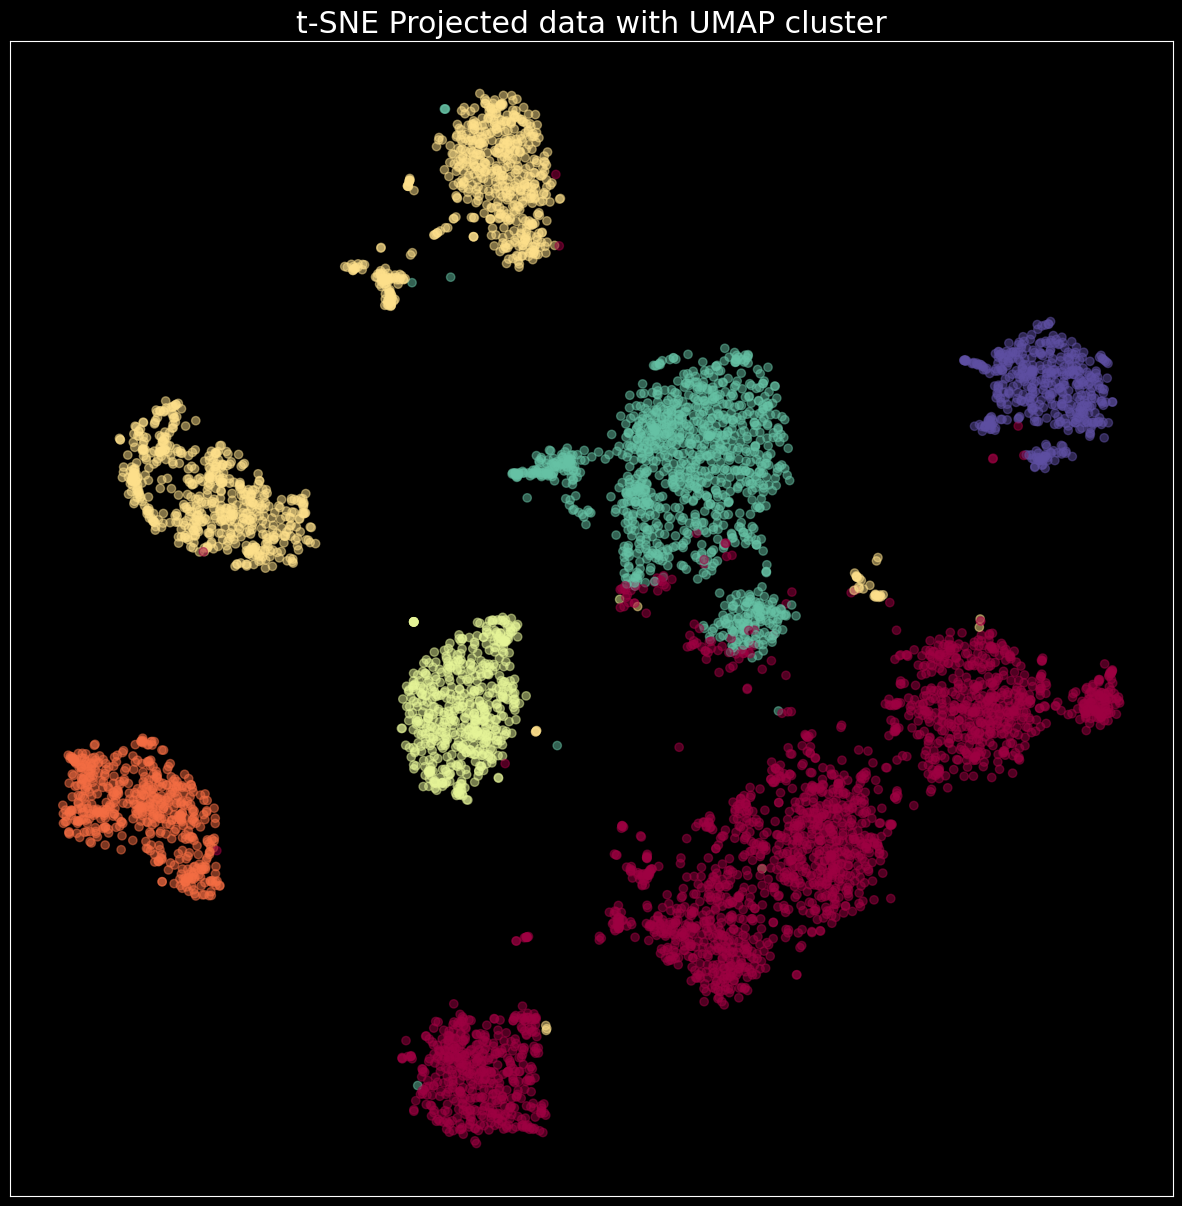

In [45]:
fig = plt.figure()

# # plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c= gene_umap_cluster['Cluster_id'],alpha =0.5, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE Projected data with UMAP cluster')
plt.show()


# plt.show()

### Compare with given labels

In [46]:
#these are the clusters that UMAP has given us
gene_umap_cluster.head()

Cluster_id
sample                     
TCGA-S9-A7J2-01           1
TCGA-44-6778-01           0
TCGA-C8-A1HL-01           4
TCGA-EW-A2FS-01           4
TCGA-05-4420-01           0

In [48]:
#phenotype_labels.csv has the true labels
phenotype = pd.read_csv('../data/phenotype_labels.csv',index_col=0)

In [49]:
phenotype.head()

sample_type_id            sample_type  \
sample                                                   
TCGA-D3-A1QA-07             7.0  Additional Metastatic   
TCGA-DE-A4MD-06             6.0             Metastatic   
TCGA-J8-A3O2-06             6.0             Metastatic   
TCGA-J8-A3YH-06             6.0             Metastatic   
TCGA-EM-A2P1-06             6.0             Metastatic   

                        _primary_disease  
sample                                    
TCGA-D3-A1QA-07  skin cutaneous melanoma  
TCGA-DE-A4MD-06        thyroid carcinoma  
TCGA-J8-A3O2-06        thyroid carcinoma  
TCGA-J8-A3YH-06        thyroid carcinoma  
TCGA-EM-A2P1-06        thyroid carcinoma

In [50]:
le = LabelEncoder()

In [51]:

phenotype['primary_disease_id'] = le.fit_transform(phenotype['_primary_disease'])

In [52]:
phenotype.head()

sample_type_id            sample_type  \
sample                                                   
TCGA-D3-A1QA-07             7.0  Additional Metastatic   
TCGA-DE-A4MD-06             6.0             Metastatic   
TCGA-J8-A3O2-06             6.0             Metastatic   
TCGA-J8-A3YH-06             6.0             Metastatic   
TCGA-EM-A2P1-06             6.0             Metastatic   

                        _primary_disease  primary_disease_id  
sample                                                        
TCGA-D3-A1QA-07  skin cutaneous melanoma                   7  
TCGA-DE-A4MD-06        thyroid carcinoma                   9  
TCGA-J8-A3O2-06        thyroid carcinoma                   9  
TCGA-J8-A3YH-06        thyroid carcinoma                   9  
TCGA-EM-A2P1-06        thyroid carcinoma                   9

In [53]:
phenotype['primary_disease_id'].value_counts()

primary_disease_id
1    1212
3     603
4     574
9     571
2     564
6     548
5     548
0     523
7     470
8     450
Name: count, dtype: int64

In [54]:
le.classes_

array(['brain lower grade glioma', 'breast invasive carcinoma',
       'head & neck squamous cell carcinoma',
       'kidney clear cell carcinoma', 'lung adenocarcinoma',
       'lung squamous cell carcinoma', 'prostate adenocarcinoma',
       'skin cutaneous melanoma', 'stomach adenocarcinoma',
       'thyroid carcinoma'], dtype=object)

In [55]:
gene_umap_cluster['disease_id'] = phenotype['primary_disease_id']

In [56]:
gene_express.head()

ENSG00000167578.16  ENSG00000078237.5  ENSG00000146083.11  \
sample                                                                       
TCGA-S9-A7J2-01              4.8881             2.3019              5.3806   
TCGA-44-6778-01              5.3162             3.5633              4.9996   
TCGA-C8-A1HL-01              4.9782             2.6624              3.9580   
TCGA-EW-A2FS-01              5.7035             1.2696              4.2189   
TCGA-05-4420-01              4.2048             3.7930              3.9626   

                 ENSG00000198242.13  ENSG00000134108.12  ENSG00000182141.9  \
sample                                                                       
TCGA-S9-A7J2-01              9.7664              5.8205             3.5009   
TCGA-44-6778-01              9.7699              5.4446             2.7805   
TCGA-C8-A1HL-01             10.7877              5.7415             1.3109   
TCGA-EW-A2FS-01             10.1460              5.7801             0.8246   
TCGA-05-4420-01             10.2336              5.2265             0.4447   

                 ENSG00000280143.1  ENSG00000258610.1  ENSG00000070087.13  \
sample                                                                      
TCGA-S9-A7J2-01             1.0363             4.8535              8.3059   
TCGA-44-6778-01             2.2330             2.8974              6.2572   
TCGA-C8-A1HL-01             1.3846             2.3649              6.3803   
TCGA-EW-A2FS-01             3.1045             1.7744              6.3243   
TCGA-05-4420-01             0.5568             1.0915              6.7894   

                 ENSG00000153561.12  ...  ENSG00000133313.14  \
sample                               ...                       
TCGA-S9-A7J2-01              3.9810  ...              7.1131   
TCGA-44-6778-01              4.1891  ...              7.3911   
TCGA-C8-A1HL-01              3.8581  ...              7.1204   
TCGA-EW-A2FS-01              3.1458  ...              6.0341   
TCGA-05-4420-01              3.3745  ...              6.2246   

                 ENSG00000066044.13  ENSG00000146587.17  ENSG00000107863.16  \
sample                                                                        
TCGA-S9-A7J2-01              5.0050              2.5437              6.3227   
TCGA-44-6778-01              5.2991              2.5061              4.1954   
TCGA-C8-A1HL-01              5.6300              1.9527              3.2251   
TCGA-EW-A2FS-01              5.3534              1.9931              3.5863   
TCGA-05-4420-01              5.3737              1.0711              3.4945   

                 ENSG00000213782.7  ENSG00000146707.14  ENSG00000158417.10  \
sample                                                                       
TCGA-S9-A7J2-01             5.2384              4.2965              5.1465   
TCGA-44-6778-01             4.5976              2.6487              5.1740   
TCGA-C8-A1HL-01             4.9016              2.4727              5.6511   
TCGA-EW-A2FS-01             4.9327              3.1556              5.8510   
TCGA-05-4420-01             6.0164              3.7667              4.8675   

                 ENSG00000089177.17  ENSG00000123685.8  ENSG00000105063.18  
sample                                                                      
TCGA-S9-A7J2-01              0.7748             1.1577              4.8151  
TCGA-44-6778-01              3.0585             1.5902              5.6436  
TCGA-C8-A1HL-01              5.1094             1.0293              4.4095  
TCGA-EW-A2FS-01              4.4277             1.4600              4.4081  
TCGA-05-4420-01              1.5366             1.6234              4.3674  

[5 rows x 14460 columns]

In [57]:
phenotype['primary_disease_id'].reindex(gene_express.index)

sample
TCGA-S9-A7J2-01    0
TCGA-44-6778-01    4
TCGA-C8-A1HL-01    1
TCGA-EW-A2FS-01    1
TCGA-05-4420-01    4
                  ..
TCGA-DJ-A2QC-01    9
TCGA-A8-A09K-01    1
TCGA-95-7947-01    4
TCGA-VQ-AA6F-01    8
TCGA-BR-8588-01    8
Name: primary_disease_id, Length: 6063, dtype: int64

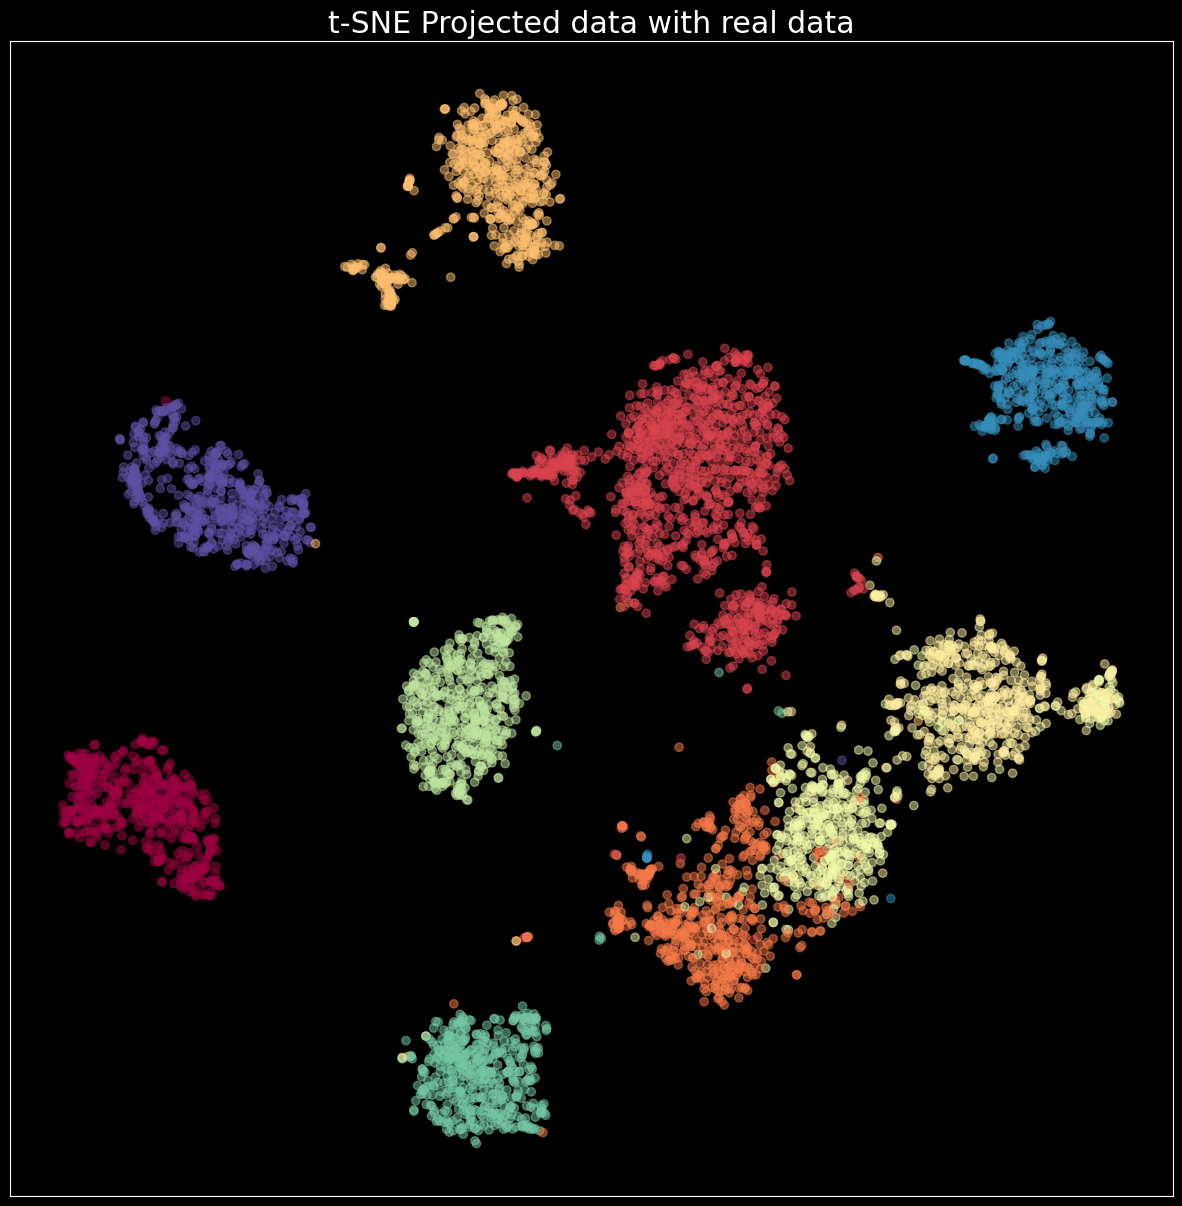

In [58]:
fig = plt.figure()

# # plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c= phenotype['primary_disease_id'].reindex(gene_express.index),alpha =0.5, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE Projected data with real data')
plt.show()


# plt.show()

In [59]:
gene_kmean_cluster['disease_id'] = phenotype['primary_disease_id']

In [60]:
gene_kmean_cluster.head()

kmean_cluster  disease_id
sample                                    
TCGA-S9-A7J2-01              5           0
TCGA-44-6778-01              3           4
TCGA-C8-A1HL-01              1           1
TCGA-EW-A2FS-01              1           1
TCGA-05-4420-01              4           4

### Sankey Diagram Kmean

In [61]:
sd = gene_kmean_cluster.groupby(["kmean_cluster", "disease_id"]).size().reset_index(name="value")

In [62]:
len(sd['disease_id'].unique())

10

In [63]:
sd['kmean_cluster'] = sd['kmean_cluster']+len(sd['disease_id'].unique())

In [64]:
sd.head()

kmean_cluster  disease_id  value
0             10           0      2
1             10           1     79
2             10           2      3
3             10           3    506
4             10           4    167

In [65]:
sd_labels = list(le.classes_) +['KMEAN'+str(i) for i in range(len(sd['kmean_cluster'].unique()))]

In [66]:
sd_labels

['brain lower grade glioma',
 'breast invasive carcinoma',
 'head & neck squamous cell carcinoma',
 'kidney clear cell carcinoma',
 'lung adenocarcinoma',
 'lung squamous cell carcinoma',
 'prostate adenocarcinoma',
 'skin cutaneous melanoma',
 'stomach adenocarcinoma',
 'thyroid carcinoma',
 'KMEAN0',
 'KMEAN1',
 'KMEAN2',
 'KMEAN3',
 'KMEAN4',
 'KMEAN5']

In [67]:
fig = go.Figure(
    data = [
    go.Sankey(
    node=dict(
        label= sd_labels
    ),
    link=dict(
        source=list(sd["disease_id"]), target=list(sd["kmean_cluster"]), value=list(sd["value"])
    ),

        )
    ]
)


fig.update_layout(title_text=" Kmeans Cluster Analysis", font_size=15)
fig.show()

### Sankey Diagram UMAP
<span style="color:green"> A Sankey diagram is a flow diagram, in which the width of arrows is proportional to the flow quantity.



https://plotly.com/python/sankey-diagram/

In [68]:
sd_umap = gene_umap_cluster.groupby(["Cluster_id", "disease_id"]).size().reset_index(name="value")

In [69]:
len(sd_umap['disease_id'].unique())

10

In [70]:
sd_umap['Cluster_id'] = sd_umap['Cluster_id']+len(sd_umap['disease_id'].unique())

In [71]:
sd_umap.head()

Cluster_id  disease_id  value
0          10           0      1
1          10           1     85
2          10           2    563
3          10           3      7
4          10           4    560

In [72]:
sd_umap_labels = list(le.classes_) +['UMAP'+str(i) for i in range(len(sd_umap['Cluster_id'].unique()))]

In [73]:
sd_umap_labels

['brain lower grade glioma',
 'breast invasive carcinoma',
 'head & neck squamous cell carcinoma',
 'kidney clear cell carcinoma',
 'lung adenocarcinoma',
 'lung squamous cell carcinoma',
 'prostate adenocarcinoma',
 'skin cutaneous melanoma',
 'stomach adenocarcinoma',
 'thyroid carcinoma',
 'UMAP0',
 'UMAP1',
 'UMAP2',
 'UMAP3',
 'UMAP4',
 'UMAP5']

In [75]:
fig = go.Figure(
    data = [
    go.Sankey(
    node=dict(
        label= sd_umap_labels
    ),
    link=dict(
        source=list(sd_umap["disease_id"]), target=list(sd_umap["Cluster_id"]), value=list(sd_umap["value"])
    ),

        )
    ]
)


fig.update_layout(title_text="UMAP Cluster Analysis", font_size=15)
fig.show()

--------------

# End of This Notebook